# Autonomous CV Project

In this project, you will work on a computer vision task for autonomous driving. This project will guide you through the steps of preparing the data, building a deep learning model, training the model, and making predictions.

## Project Steps Overview:
1. **Data Preprocessing:** Load and preprocess the image data.
2. **Data Augmentation:** Apply augmentation techniques to increase the dataset variability.
3. **Model Building:** Define the CNN architecture using a deep learning framework.
4. **Model Training:** Train the CNN model with the prepared data.
5. **Prediction:** Use the trained model to make predictions on test data.

Let's get started! Provided below is some code to help you get set up with the data and imports.

### Importing Libraries
First, import the necessary libraries for data manipulation, visualization, and model building.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split, Subset
from PIL import Image
import os
import numpy as np

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the Dataset

Download and load the image dataset, and apply the necessary transformations. Make sure to adjust the path to your dataset.

In [3]:
# Define data transforms
data_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [4]:
# Load datasets
train_dataset = ImageFolder(root="/content/drive/MyDrive/GTSRB/Train", transform=data_transforms)

In [5]:
# Use a smaller portion of the dataset
portion = 0.05  # Use 10% of the dataset for training and validation
total_size = len(train_dataset)
subset_size = int(portion * total_size)
indices = np.random.choice(total_size, subset_size, replace=False)

In [6]:
# Split the subset indices into training and validation sets
train_size = int(0.8 * subset_size)
val_size = subset_size - train_size
train_indices = indices[:train_size]
val_indices = indices[train_size:]

### Preparing Data for CNN
Create subsets for your train and validation data using the `Subset` from PyTorch, and then create the data loaders using PyTorch's `DataLoader`

In [15]:
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

In [16]:
batch_size = 32
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

# Model Building
Define the CNN model architecture:
1. **Define the model**: Create a class or function to define the CNN layers and architecture (hint: try using 3 convolutional layers, and play around with kernel_size and padding)
3. **Compile the model**: Initialize the model, specify the loss function, optimizer, and evaluation metrics.

In [11]:
NUM_CATEGORIES = len(os.listdir("/content/drive/MyDrive/GTSRB/Train"))
NUM_CATEGORIES

43

In [17]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 43)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [21]:
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Model Training
Train the CNN model with the prepared data:
1. **Implement the training loop**: Iterate over the training data, perform forward and backward passes, and update the model weights.
2. **Monitor the training**: Track the training loss and accuracy to ensure the model is learning.

In [24]:
num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")


Epoch [1/25], Loss: 0.0658, Accuracy: 0.9831
Epoch [2/25], Loss: 0.0599, Accuracy: 0.9881
Epoch [3/25], Loss: 0.0396, Accuracy: 0.9887
Epoch [4/25], Loss: 0.0315, Accuracy: 0.9900
Epoch [5/25], Loss: 0.0306, Accuracy: 0.9906
Epoch [6/25], Loss: 0.0108, Accuracy: 0.9981
Epoch [7/25], Loss: 0.0178, Accuracy: 0.9956
Epoch [8/25], Loss: 0.0302, Accuracy: 0.9931
Epoch [9/25], Loss: 0.0587, Accuracy: 0.9831
Epoch [10/25], Loss: 0.0467, Accuracy: 0.9906
Epoch [11/25], Loss: 0.0702, Accuracy: 0.9812
Epoch [12/25], Loss: 0.1384, Accuracy: 0.9600
Epoch [13/25], Loss: 0.1116, Accuracy: 0.9794
Epoch [14/25], Loss: 0.0534, Accuracy: 0.9850
Epoch [15/25], Loss: 0.0299, Accuracy: 0.9931
Epoch [16/25], Loss: 0.0049, Accuracy: 0.9994
Epoch [17/25], Loss: 0.0009, Accuracy: 1.0000
Epoch [18/25], Loss: 0.0005, Accuracy: 1.0000
Epoch [19/25], Loss: 0.0004, Accuracy: 1.0000
Epoch [20/25], Loss: 0.0003, Accuracy: 1.0000
Epoch [21/25], Loss: 0.0003, Accuracy: 1.0000
Epoch [22/25], Loss: 0.0002, Accuracy: 1.00

# Prediction
Use the trained model to make predictions on test data:
1. **Implement the prediction function**: Use the trained model to generate predictions on the validation data (hint: you may need to loop over the images and labels provided in the `val_loader`)
2. **Evaluate the model's performance**: Calculate metrics like accuracy, precision, recall, etc., to assess the model's performance.
3. **Visualize the results**: Display the predicted vs actual labels to visually inspect the model's performance.
4. **Try predicting on an actual image**: Provide an image to the model to make a prediction

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWa

Validation Loss: 1.2608, Validation Accuracy: 0.8400
Precision: 0.8510, Recall: 0.8400, F1-score: 0.8354
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.76      0.85      0.80        26
          10       0.91      1.00      0.95        20
          11       0.91      0.77      0.83        13
          12       1.00      0.97      0.98        29
          13       1.00      0.83      0.91        12
          14       0.88      1.00      0.93         7
          15       1.00      1.00      1.00         3
          16       1.00      0.83      0.91         6
          17       1.00      1.00      1.00        12
          18       0.88      0.64      0.74        11
          19       1.00      1.00      1.00         3
           2       0.86      0.95      0.90        20
          20       0.75      1.00      0.86         3
          21       1.00      1.00      1.00         3
          22       1.00      0

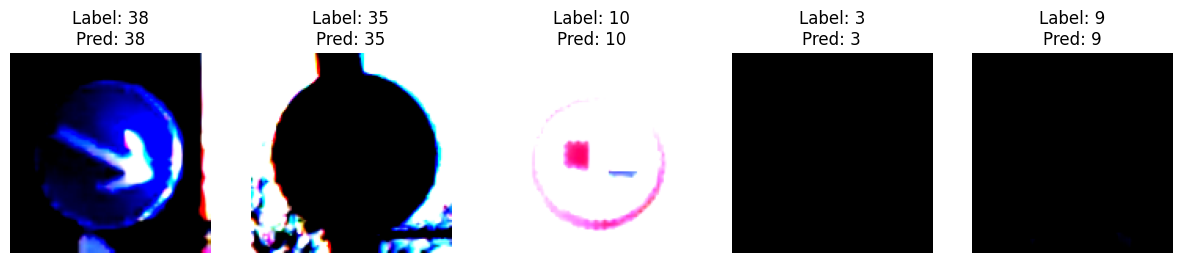

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
model.eval()
val_loss = 0.0
correct = 0
total = 0
all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in val_loader:
          images, labels = images.to(device), labels.to(device)  # Move data to the device
          outputs = model(images)
          loss = criterion(outputs, labels)
          val_loss += loss.item()
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          all_labels.extend(labels.cpu().numpy())
          all_preds.extend(predicted.cpu().numpy())

val_loss /= len(val_loader)
val_accuracy = correct / total

print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))

cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:\n", cm)

    # Visualize some predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
      img, label = val_subset[i]
      img = img.unsqueeze(0).to(device)
      model.eval()
      with torch.no_grad():
            output = model(img)
            _, pred = torch.max(output, 1)
      ax.imshow(img.cpu().squeeze().permute(1, 2, 0))
      ax.set_title(f"Label: {train_dataset.classes[label]}\nPred: {train_dataset.classes[pred.item()]}")
      ax.axis('off')
plt.show()

In [26]:
def predict_image(image_path):
    transform = data_transforms
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, pred = torch.max(output, 1)
    return train_dataset.classes[pred.item()]

image_path = '/content/drive/MyDrive/GTSRB/Test/00000.png'
prediction = predict_image(image_path)
print(f"Predicted class: {prediction}")

Predicted class: 16
